In [ ]:
# ------------------------
# SETUP AND IMPORTS
# ------------------------
import pandas as pd
import talib
import matplotlib.pyplot as plt
import pynance as pn
import ta


# ------------------------
# DATA LOADING
# ------------------------
companies = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
dataframes = {}

for company in companies:
    filename = f"../../data/yfinance_data/{company}_historical_data.csv"
    df= pd.read_csv(filename, parse_dates=['Date'], index_col=['Date'])
    print(f"company {company} data loaded successfully")
    df = df[['Open', 'High', 'Low', 'Close', 'Volume']].dropna()
    dataframes[company]= df


company AAPL data loaded successfully
company AMZN data loaded successfully
company GOOG data loaded successfully
company META data loaded successfully
company MSFT data loaded successfully
company NVDA data loaded successfully
company TSLA data loaded successfully
['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE', 'ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM', 'ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH', 'ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR', 'BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CD

In [ ]:
# ------------------------------
# Calculate Technical Indicator
# ------------------------------

for company, df in dataframes.items():
    df['MA20'] = talib.SMA(df['Close'], timeperiod=20)
    dataframes[company] = df

In [ ]:
for company in companies:
    df = pn.data.get(company, '2023-01-01', '2024-12-31')
    df['MA20'] = talib.SMA(df['Close'], timeperiod=20)
    dataframes[company] = df

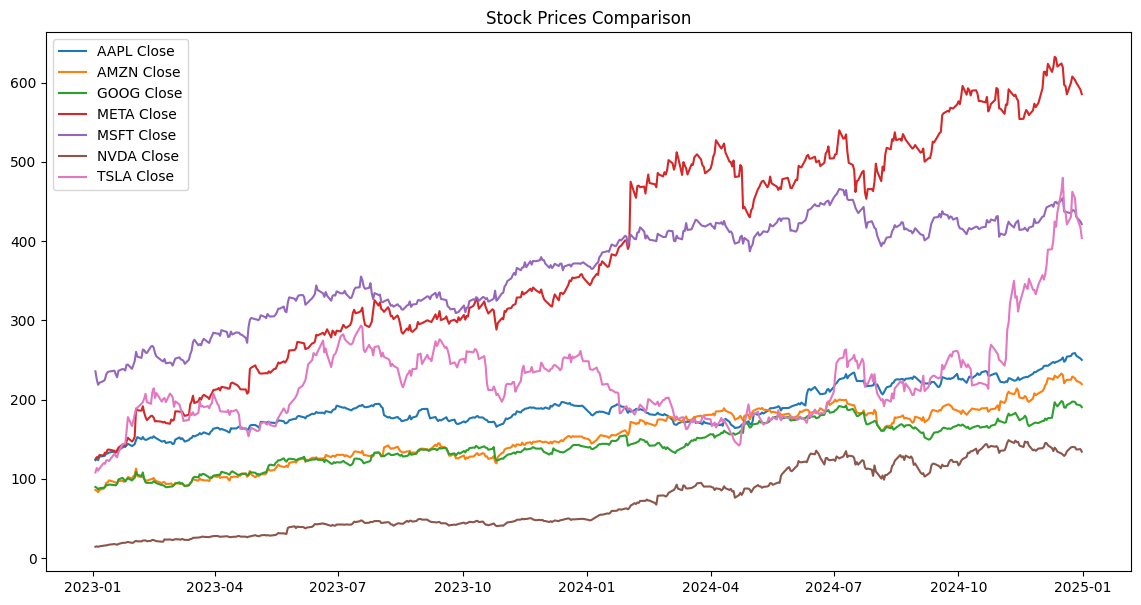

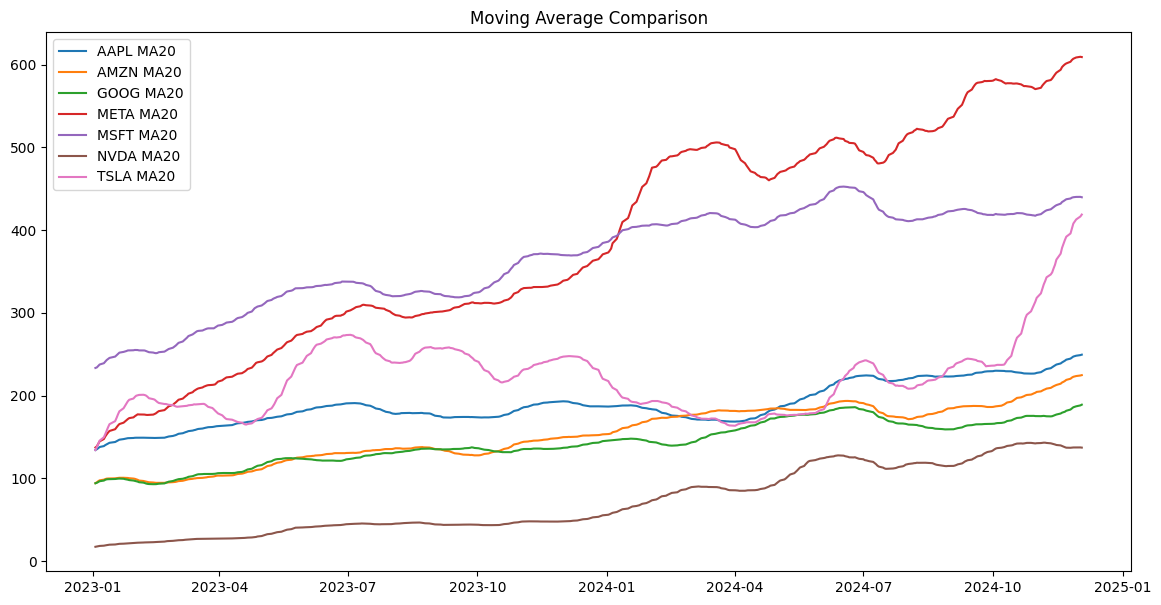

In [58]:
plt.figure(figsize=(14,7))
for company, df in dataframes.items():
    plt.plot(df.index, df['Close'], label=f'{company} Close')
plt.title('Stock Prices Comparison')
plt.legend()
plt.show()

plt.figure(figsize=(14,7))
for company, df in dataframes.items():
    plt.plot(df.index, df['MA20'], label=f'{company} MA20')
plt.title('Moving Average Comparison')
plt.legend()
plt.show()


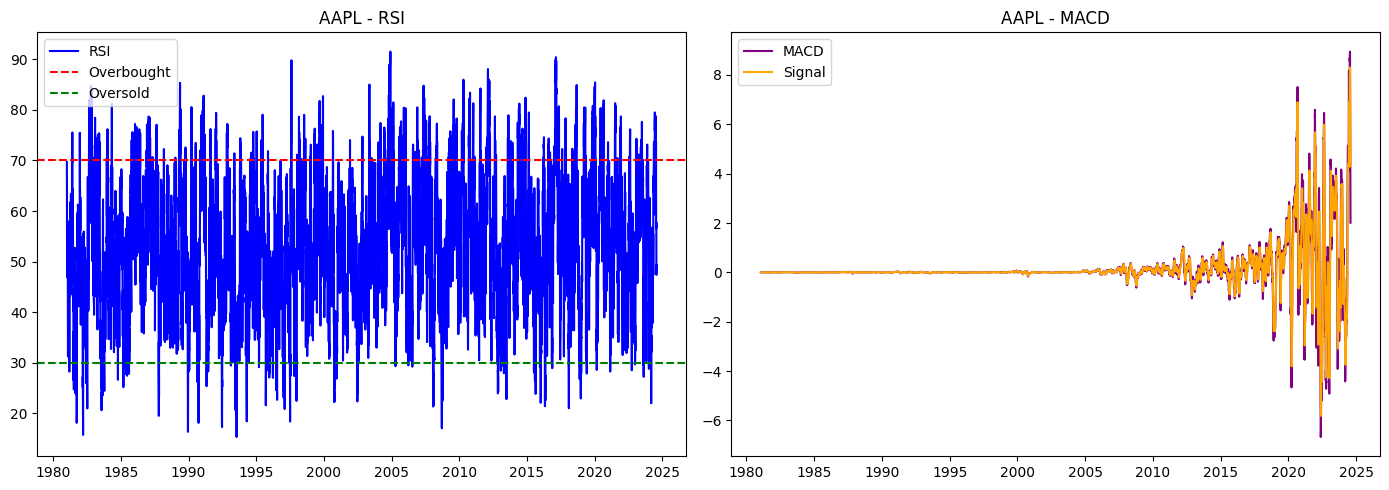

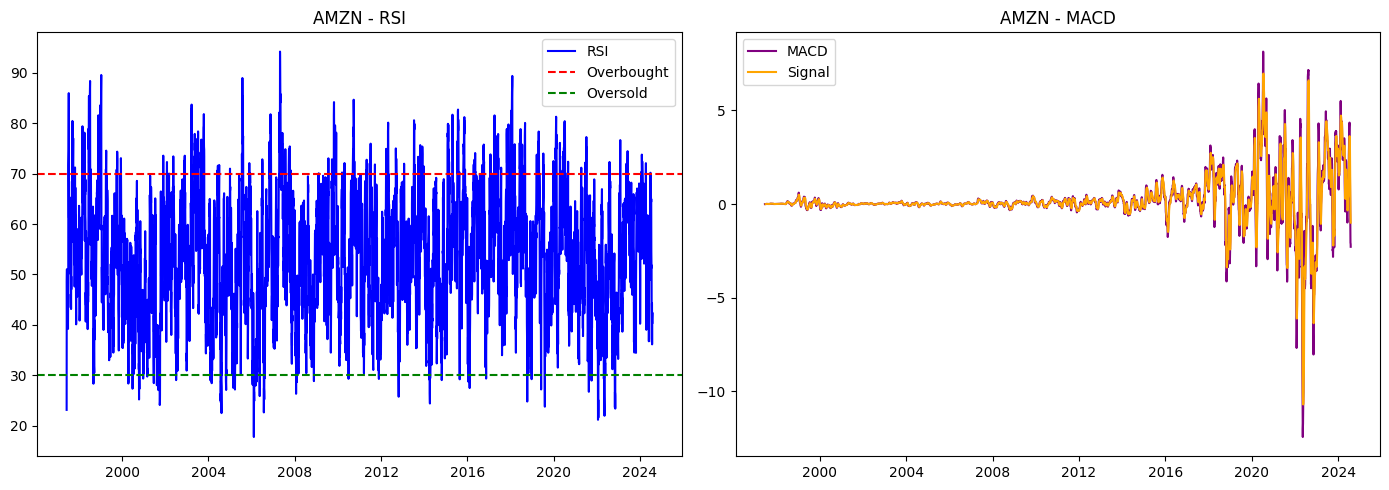

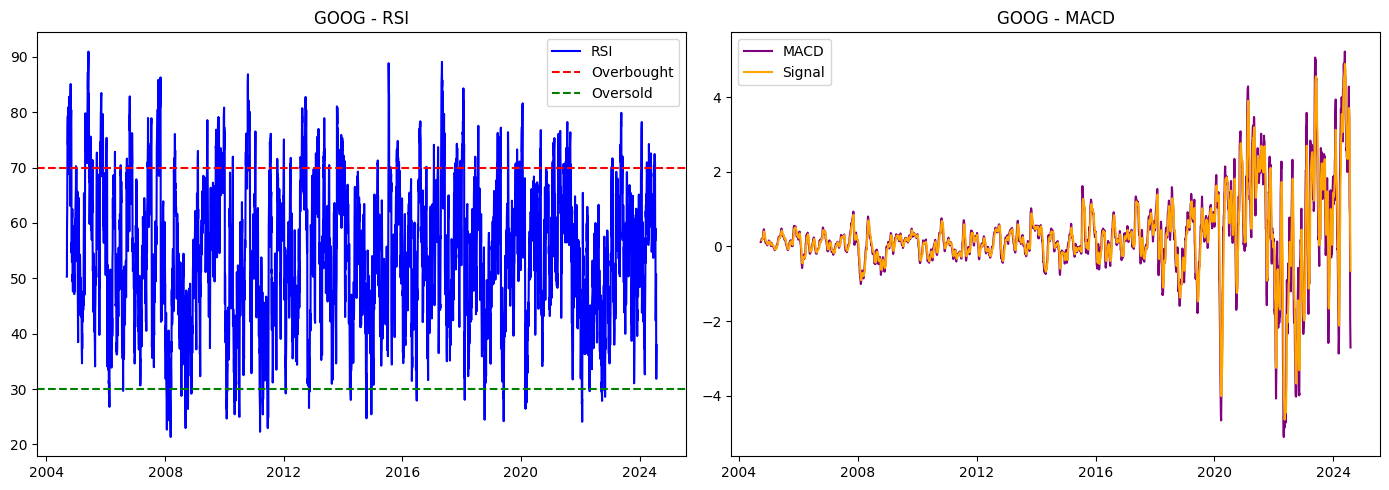

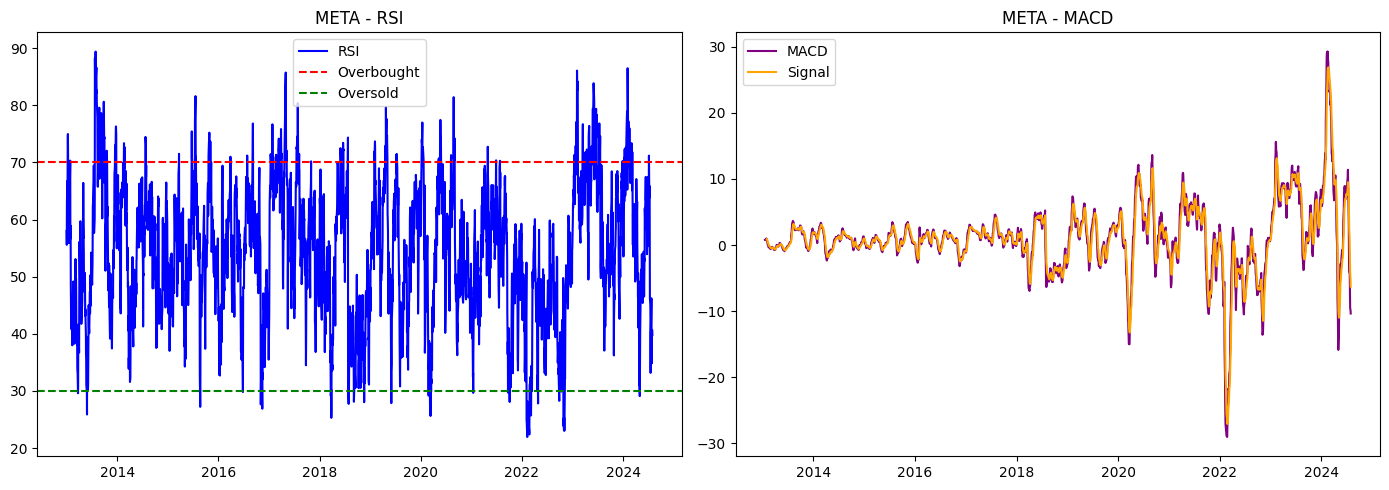

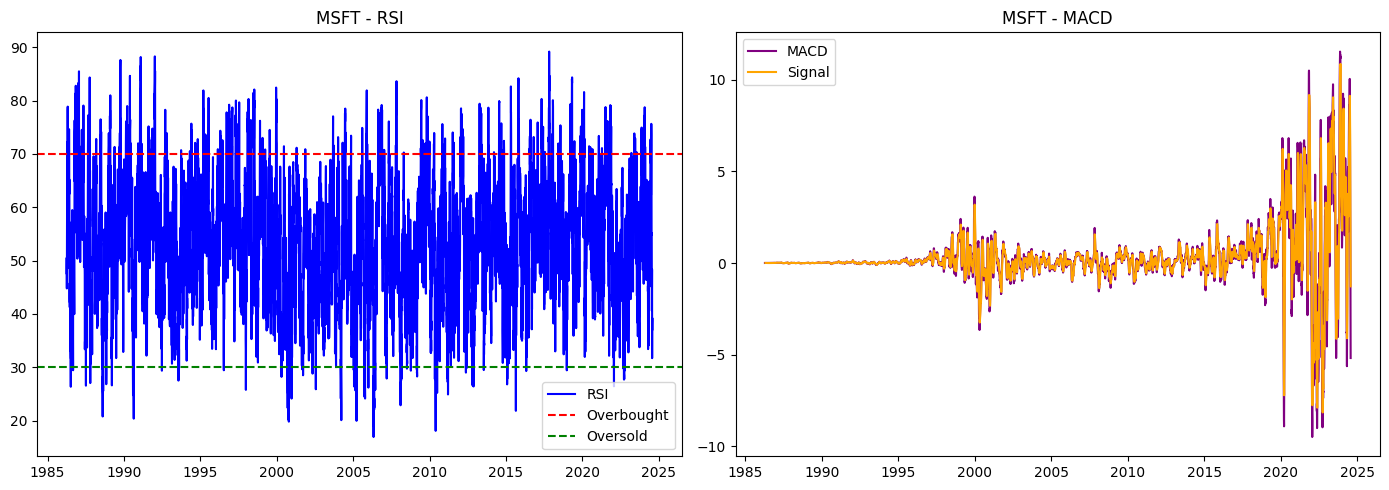

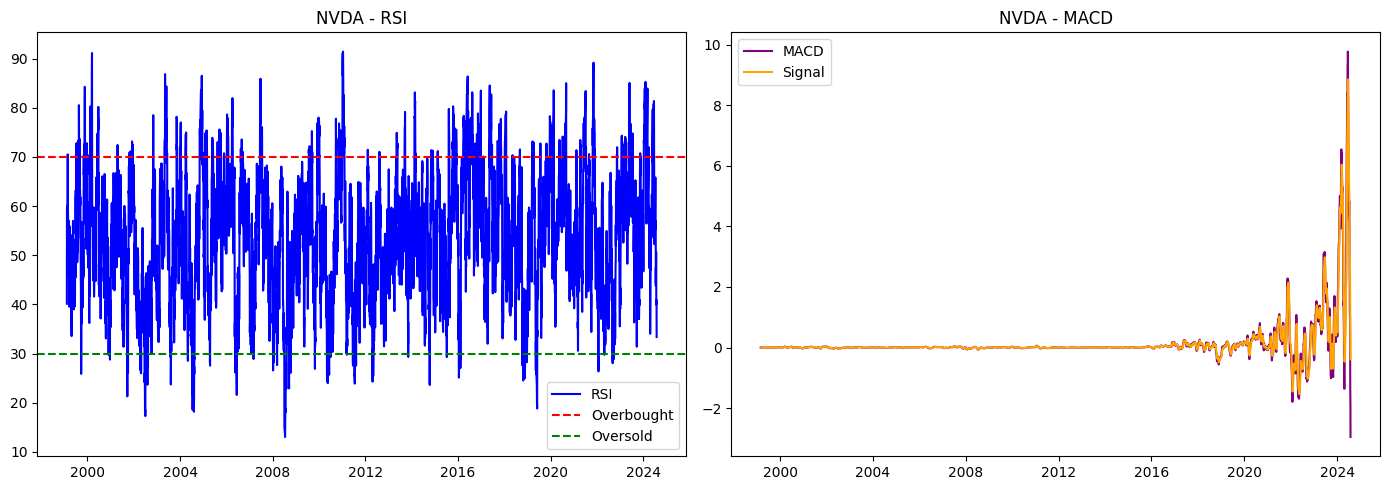

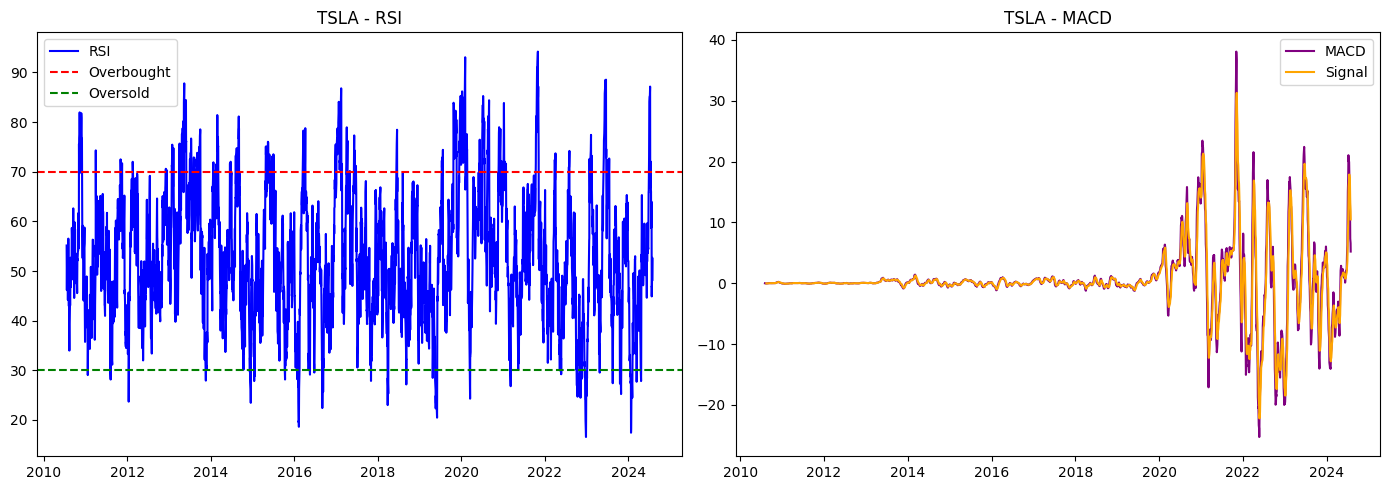

In [ ]:
# ------------------------------
# RSI and MACD visualization
# ------------------------------
def plot_rsi_macd(data_dict):
    num_companies = len(data_dict)
    fig, axes = plt.subplots(num_companies, 2, figsize=(14, 5 * num_companies))

    if num_companies == 1:
        axes = [axes] 

    for idx, (company, df) in enumerate(data_dict.items()):
        df = df.copy()
        df['RSI'] = ta.momentum.RSIIndicator(close=df['Close']).rsi()
        macd = ta.trend.MACD(close=df['Close'])
        df['MACD'] = macd.macd()
        df['Signal'] = macd.macd_signal()

        # RSI Plot
        axes[idx][0].plot(df['Date'], df['RSI'], label='RSI', color='blue')
        axes[idx][0].axhline(70, color='red', linestyle='--', label='Overbought')
        axes[idx][0].axhline(30, color='green', linestyle='--', label='Oversold')
        axes[idx][0].set_title(f'{company} - RSI')
        axes[idx][0].legend()

        # MACD Plot
        axes[idx][1].plot(df['Date'], df['MACD'], label='MACD', color='purple')
        axes[idx][1].plot(df['Date'], df['Signal'], label='Signal', color='orange')
        axes[idx][1].set_title(f'{company} - MACD')
        axes[idx][1].legend()

    plt.tight_layout()
    plt.show()

# RSI and MACD visualization for all companies
for company in companies:
    filename = f"../../data/yfinance_data/{company}_historical_data.csv"
    df = pd.read_csv(filename, parse_dates=['Date'], index_col='Date')
    df = df.reset_index()  # brings 'Date' back as a column
    plot_rsi_macd({company: df})
